How many observations and features do you have?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
immo = pd.read_csv("final_raw_dropped.csv")
#remove unnecessary columns
immo_c = immo.drop(columns=["Unnamed: 0", "public_sales","notary_sales","country","id"], axis=1)


In [4]:
immo_c["epc"].value_counts()
#clean epc
drop_epc = ["F_C","A_A+","F_E","A+_A++","D_C","G_C","E_C","F_B","D_B","G_E","F_D","G_F","G_D","A_A++","B_A"]
immo_cl = immo_c[~immo_c["epc"].isin(drop_epc)]


What is the proportion of missing values per column?


C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\1267158529.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


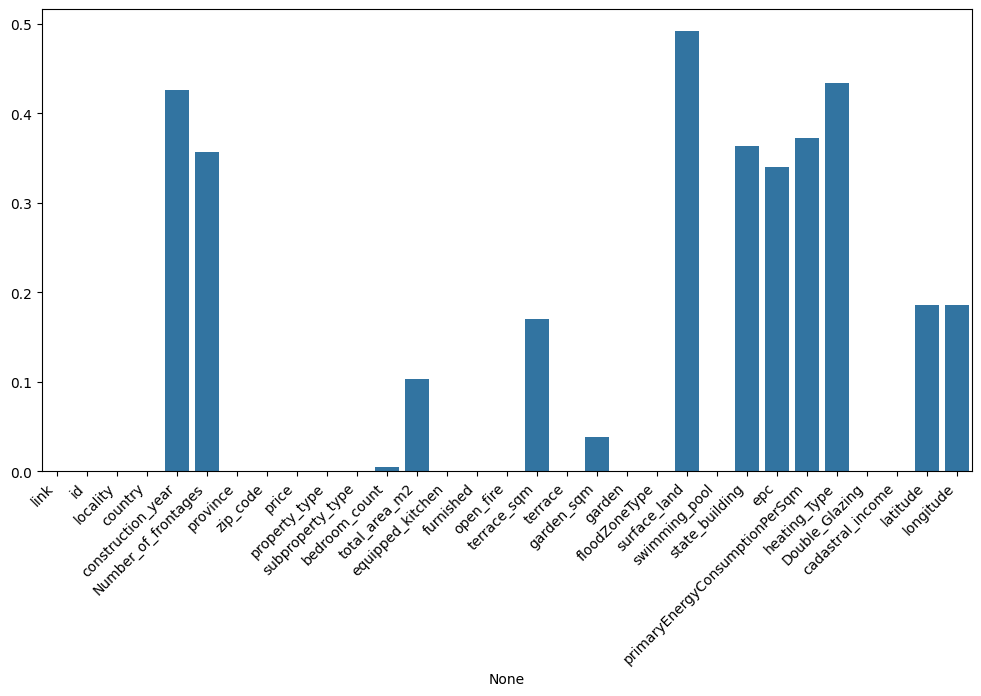

In [5]:
missing_values = immo_cl.isnull().mean()
plt.figure(figsize=(12, 6))

ax =sns.barplot(x=missing_values.index, y=missing_values.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#error = immo.isnull().std()
#plt.errorbar(x=missing_values.index, y=missing_values.values, yerr=error)
plt.show()

Which variables would you delete and why?


-public_sales & notary_ sales -> no value
country, link, id


In [6]:
custom_mapping = {'A++': 1, 'A+': 2, 'A': 3, 'B': 4, 'C': 5, 'D': 6, 'E': 7, 'F': 8, 'G': 9}
#immo_cl.sort_values("epc", inplace=True)
#immo_cl["epc_n"] = immo_cl["epc"].astype("category").cat.codes + 1
immo_cl["epc_n"] =immo_cl["epc"].map(custom_mapping)
state_mapping = {'JUST_RENOVATED': 1, 'AS_NEW': 2, 'GOOD': 3, 'TO_BE_DONE_UP': 4, 'TO_RENOVATE': 5, 'TO_RESTORE': 6}
immo_cl["state_building_n"] =immo_cl["state_building"].map(state_mapping)

C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\3451319561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_cl["epc_n"] =immo_cl["epc"].map(custom_mapping)
C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\3451319561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_cl["state_building_n"] =immo_cl["state_building"].map(state_mapping)


In [7]:
#immo["epc"].value_counts()
immo_cl["heating_Type"].value_counts()
immo_cl[immo_cl["heating_Type"]=="SOLAR"]


,link,id,locality,country,construction_year,Number_of_frontages,province,zip_code,price,property_type,...,state_building,epc,primaryEnergyConsumptionPerSqm,heating_Type,Double_Glazing,cadastral_income,latitude,longitude,epc_n,state_building_n
420,https://www.immoweb.be/en/classified/house/for...,11036559,Brugge,Belgium,NaN,2.0,West Flanders,8000,428500.0,HOUSE,...,JUST_RENOVATED,A,46.0,SOLAR,1,321.0,51.216304,3.223094,3.0,1.0
1248,https://www.immoweb.be/en/classified/house/for...,11109892,Brugge,Belgium,NaN,2.0,West Flanders,8020,477000.0,HOUSE,...,NaN,NaN,NaN,SOLAR,1,0.0,51.143549,3.231637,NaN,NaN
1253,https://www.immoweb.be/en/classified/house/for...,11109863,Brugge,Belgium,NaN,3.0,West Flanders,8020,547000.0,HOUSE,...,NaN,NaN,NaN,SOLAR,1,0.0,51.143626,3.232003,NaN,NaN
1260,https://www.immoweb.be/en/classified/house/for...,11109864,Brugge,Belgium,NaN,3.0,West Flanders,8020,554000.0,HOUSE,...,NaN,NaN,NaN,SOLAR,1,0.0,51.143889,3.232333,NaN,NaN
11400,https://www.immoweb.be/en/classified/apartment...,10951197,Oostend,Belgium,NaN,3.0,West Flanders,8400,475000.0,APARTMENT,...,NaN,NaN,NaN,SOLAR,0,0.0,51.201004,2.913515,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83593,https://www.immoweb.be/en/classified/villa/for...,11044357,Leuven,Belgium,2024.0,4.0,Flemish Brabant,3201,599990.0,HOUSE,...,NaN,NaN,NaN,SOLAR,0,0.0,51.031967,4.924454,NaN,NaN
83691,https://www.immoweb.be/en/classified/house/for...,10945990,Leuven,Belgium,2023.0,4.0,Flemish Brabant,3270,520000.0,HOUSE,...,AS_NEW,A,30.0,SOLAR,0,0.0,50.974246,4.992779,3.0,2.0
83699,https://www.immoweb.be/en/classified/house/for...,10945983,Leuven,Belgium,2023.0,4.0,Flemish Brabant,3270,540000.0,HOUSE,...,AS_NEW,A,30.0,SOLAR,0,0.0,50.974372,4.992683,3.0,2.0
83875,https://www.immoweb.be/en/classified/house/for...,11118853,Leuven,Belgium,2023.0,3.0,Flemish Brabant,3211,495000.0,HOUSE,...,AS_NEW,A,NaN,SOLAR,1,0.0,50.877469,4.891713,3.0,2.0


What variables are most subject to outliers?


In [11]:
numerical_columns = immo_cl.select_dtypes(include=["number"]).columns
plt.figure(figsize=(10, 6))
cutoffs = []
for column in numerical_columns:
    q1 = immo_cl[column].quantile(0.25)
    q3 = immo_cl[column].quantile(0.75)
    iqr = q3 - q1
    lower_cutoff = q1 - 1.5 * iqr
    upper_cutoff = q3 + 1.5 * iqr
    immo_cl[f'{column}_lower_cutoff'] = lower_cutoff
    immo_cl[f'{column}_upper_cutoff'] = upper_cutoff
    print(f"Column: {column}")
    print("Lower Cutoff:", lower_cutoff)
    print("Upper Cutoff:", upper_cutoff)





C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\305818616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_cl[f'{column}_lower_cutoff'] = lower_cutoff
C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\305818616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_cl[f'{column}_upper_cutoff'] = upper_cutoff
C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\305818616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Column: id
Lower Cutoff: 10395995.375
Upper Cutoff: 11504168.375
Column: construction_year
Lower Cutoff: 1875.5
Upper Cutoff: 2111.5
Column: Number_of_frontages
Lower Cutoff: -1.0
Upper Cutoff: 7.0
Column: zip_code
Lower Cutoff: -6905.0
Upper Cutoff: 17535.0
Column: price
Lower Cutoff: -75000.0
Upper Cutoff: 765000.0
Column: bedroom_count
Lower Cutoff: 0.5
Upper Cutoff: 4.5
Column: total_area_m2
Lower Cutoff: -45.5
Upper Cutoff: 318.5
Column: equipped_kitchen
Lower Cutoff: -1.5
Upper Cutoff: 2.5
Column: furnished
Lower Cutoff: 0.0
Upper Cutoff: 0.0
Column: open_fire
Lower Cutoff: 0.0
Upper Cutoff: 0.0
Column: terrace_sqm
Lower Cutoff: -22.5
Upper Cutoff: 37.5
Column: terrace
Lower Cutoff: -1.5
Upper Cutoff: 2.5
Column: garden_sqm
Lower Cutoff: 0.0
Upper Cutoff: 0.0
Column: garden
Lower Cutoff: 0.0
Upper Cutoff: 0.0
Column: floodZoneType
Lower Cutoff: -1.5
Upper Cutoff: 2.5
Column: surface_land
Lower Cutoff: -820.0
Upper Cutoff: 1756.0
Column: swimming_pool
Lower Cutoff: 0.0
Upper Cutof

C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\305818616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_cl[f'{column}_lower_cutoff'] = lower_cutoff
C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\305818616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immo_cl[f'{column}_upper_cutoff'] = upper_cutoff
C:\Users\Hazem\AppData\Local\Temp\ipykernel_13152\305818616.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

<Figure size 1000x600 with 0 Axes>

How many qualitative and quantitative variables are there? How would you transform the qualitative values into numerical values?



Text(0.5, 1.0, 'Correlation Heatmap')

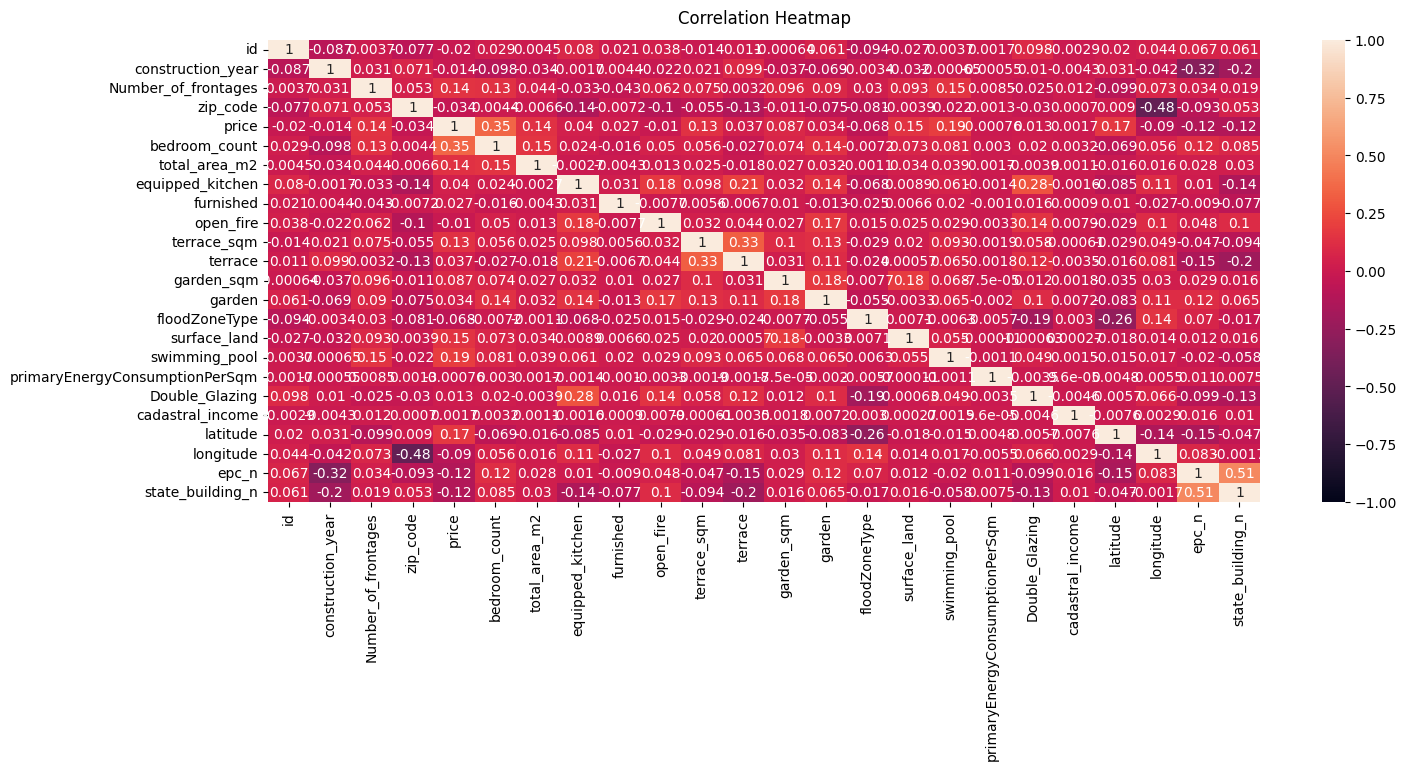

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(immo_cl.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?



6

How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?
